In [1]:
## importing libraries
!pip install kaggle
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configurations of the plots we will create



In [2]:
pd.set_option('display.max_columns', None)

In [36]:
pd.set_option('display.max_rows', None)  # Display all rows

In [3]:
!kaggle datasets download -d danielgrijalvas/movies


movies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

with zipfile.ZipFile('movies.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [5]:
# let's look at the data

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [7]:
df.shape

(7668, 15)

In [8]:
# let's see if there's any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [9]:
# data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [11]:
# Creating a new dataset so the original dataset won't be changed
# Make a deep copy of the original dataframe
new_df = df.copy()

# Drop columns with more than 30% missing values
if new_df['budget'].isnull().mean() > 0.3:
    new_df.drop(columns=['budget'], inplace=True)

# Drop rows where 'rating' is missing as it's a very small percentage
new_df.dropna(subset=['rating'], inplace=True)

# Fill missing values for numerical columns with the median of the column
for column in ['score', 'votes', 'runtime', 'gross']:  # Assuming these columns exist in df
    new_df[column].fillna(new_df[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode (most frequent value)
for column in ['released', 'writer', 'star', 'country', 'company']:  # Assuming these columns exist in df
    new_df[column].fillna(new_df[column].mode()[0], inplace=True)

In [12]:
missing_values_count = new_df.isnull().sum()
print(missing_values_count)

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2114
gross          0
company        0
runtime        0
dtype: int64


In [13]:
# replacing NaN values in budget with its mean
# Mean imputation
new_df['budget'].fillna(new_df['budget'].mean(), inplace=True)

In [14]:
missing_values_count = new_df.isnull().sum()
print(missing_values_count)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [15]:
new_df.shape

(7591, 15)

In [16]:
new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
# change data type of columns
new_df['budget'] = new_df['budget'].astype('int64')

new_df['gross'] = new_df['gross'].astype('int64')

new_df['votes'] = new_df['votes'].astype('int64')

In [18]:
new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [21]:
new_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300,Teng Cheng,Woody Allen,Guangtao Jiang,China,35699409,240663149,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35699409,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20343051,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35699409,13266,Roxwell Films,87.0


In [22]:
# Create correct year column

new_df['year_correct'] = new_df['released'].str.extract(pat = '([0-9]{4})').astype(str)

new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [23]:
# we want to know the sorted values by gross
new_df.sort_values(by=['gross'], inplace=True, ascending=False)
new_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35699409,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35699409,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35699409,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35699409,682,Roxwell Films,93.0,2020


In [24]:
# Drop any dupliates

new_df.drop_duplicates()

new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [26]:
# Budget High Correlations
# Company High Correlations

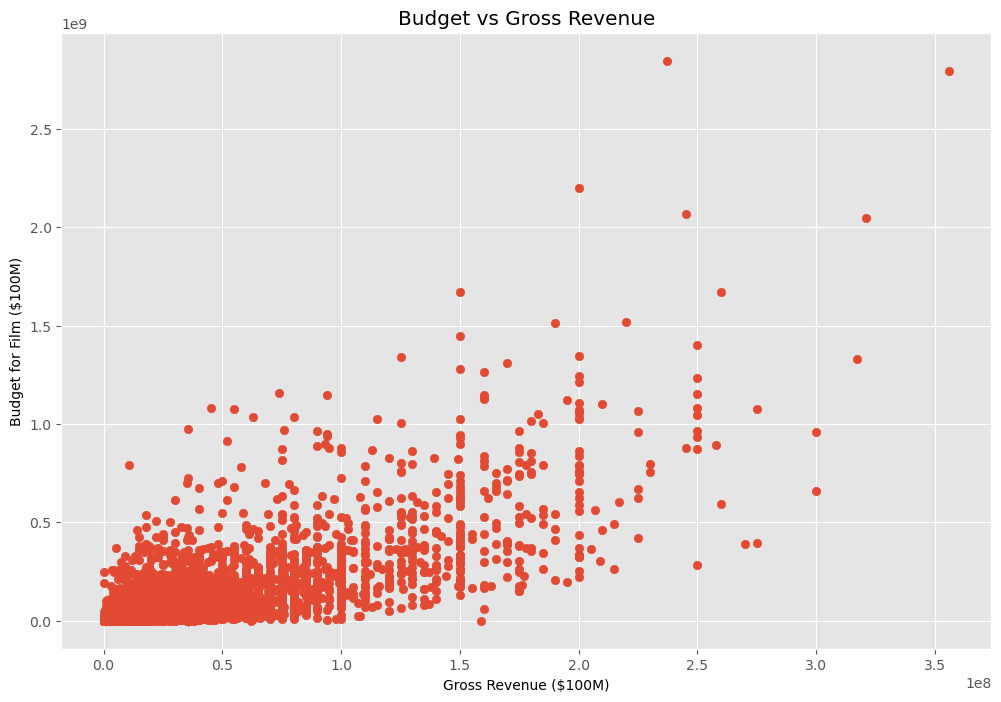

In [25]:
# Scatter plot with Budget vs Gross
plt.scatter(x=new_df['budget'], y=new_df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue ($100M)')
plt.ylabel('Budget for Film ($100M)')
plt.show()

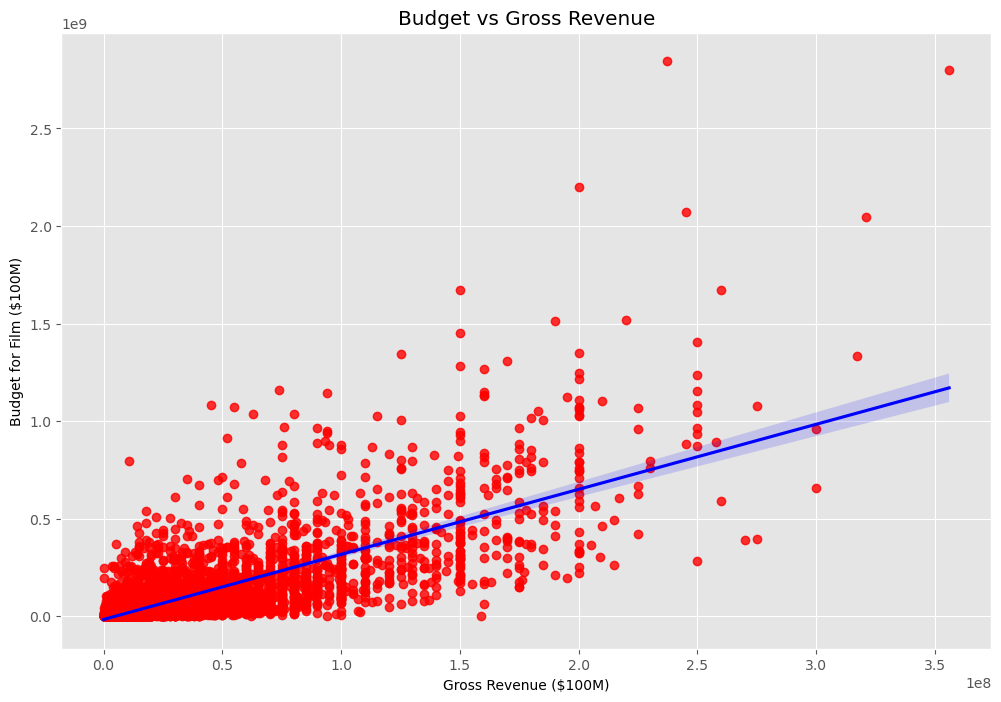

In [30]:
# Plot budget vs gross revenue 
# Regression line added with Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue ($100M)')
plt.ylabel('Budget for Film ($100M)')
plt.show()

In [26]:
# Let's start looking at the correlations
new_df.corr(method='pearson', numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.103583,0.226889,0.268470,0.262178,0.121440
score,0.103583,1.000000,0.411965,0.064743,0.187834,0.400942
votes,0.226889,0.411965,1.000000,0.420897,0.632331,0.309618
budget,0.268470,0.064743,0.420897,1.000000,0.713287,0.265681
gross,0.262178,0.187834,0.632331,0.713287,1.000000,0.244458
runtime,0.121440,0.400942,0.309618,0.265681,0.244458,1.000000


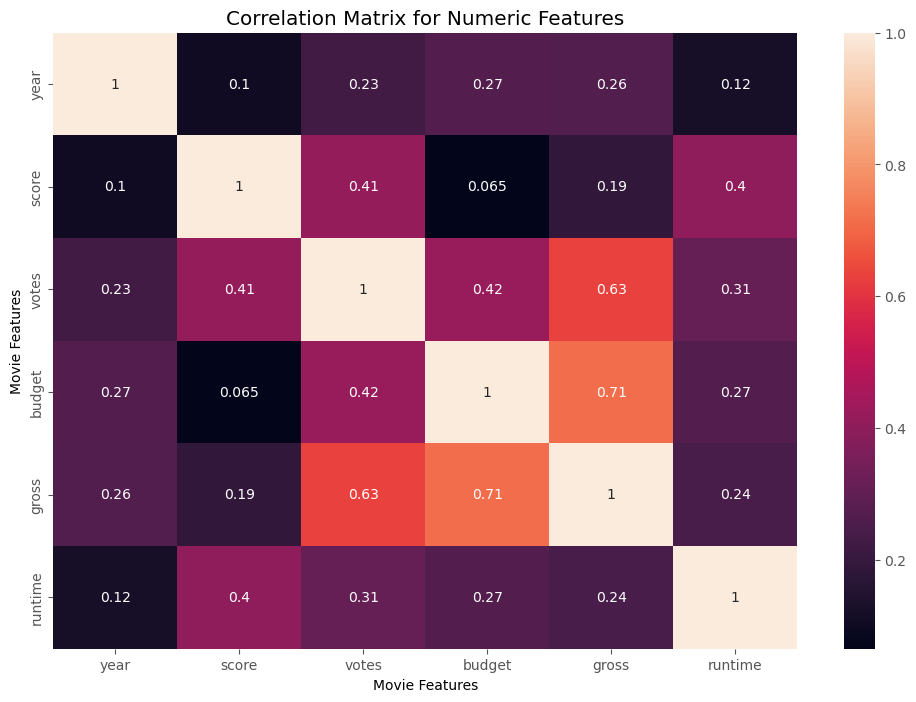

In [27]:
# Visualizing correlation pairs with heatmap

correlation_matrix = new_df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

#### 0.71: strong correlation between budget and gross revenue

#### 0.63: moderate correlation between votes and gross revenue

In [28]:
# Looks at company
new_df_numerize = new_df

for col_name in new_df_numerize.columns :
    if(new_df_numerize[col_name].dtype == 'object'):
        new_df_numerize[col_name] = new_df_numerize[col_name].astype('category')
        new_df_numerize[col_name] = new_df_numerize[col_name].cat.codes
        
new_df_numerize
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,528,5,0,2009,690,7.8,1100000,1139,1759,2289,55,237000000,2847246203,2212,162.0,29
7445,530,5,0,2019,182,8.4,903000,160,732,2198,55,356000000,2797501328,1575,181.0,39
3045,6827,5,6,1997,698,7.8,1100000,1139,1759,1565,55,200000000,2201647264,2212,194.0,17
6663,5086,5,0,2015,692,7.8,876000,1109,2522,509,55,245000000,2069521700,1509,138.0,35
7244,531,5,0,2018,191,8.4,897000,160,732,2198,55,321000000,2048359754,1575,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2659,6,5,1998,2999,6.1,2900,1924,1262,2118,54,35699409,1672,1833,87.0,18
2906,4348,3,5,1996,520,7.4,37000,2019,1936,1478,11,35699409,1605,328,110.0,16
3818,3326,6,4,2000,1105,6.5,5200,718,1107,2274,54,35699409,1400,466,103.0,21
7580,4610,3,5,2019,1816,5.2,735,1426,2180,2234,55,35699409,682,1952,93.0,40


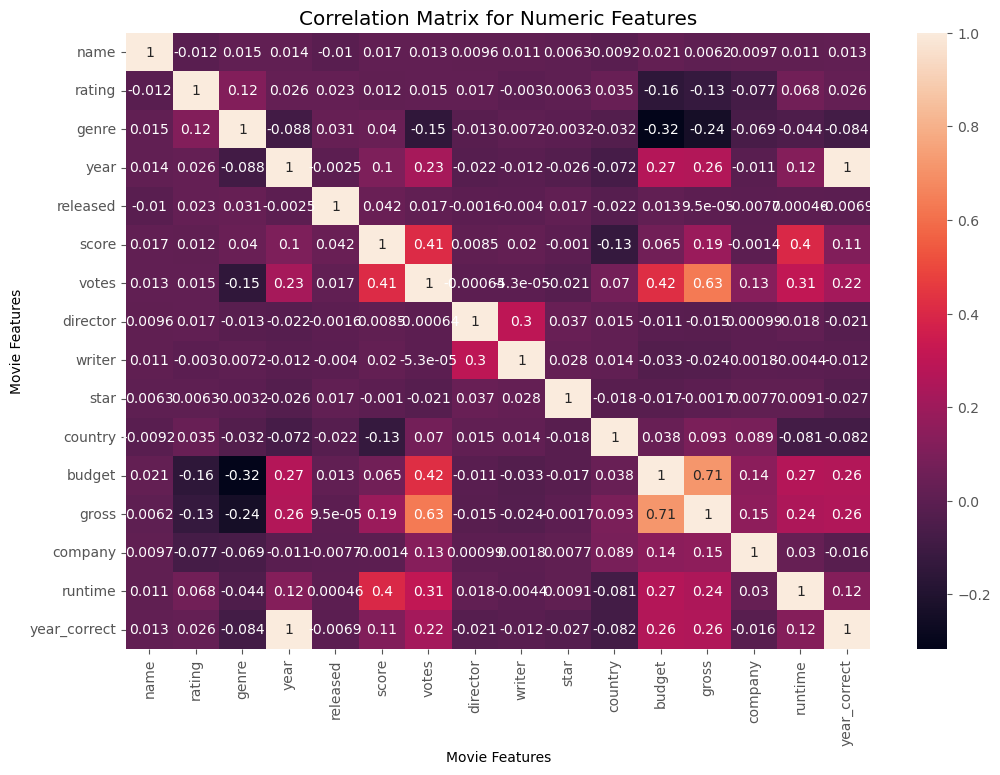

In [31]:
# Visualizing correlation pairs with heatmap

correlation_matrix = new_df_numerize.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [32]:
new_df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.012160,0.015087,0.013595,-0.010149,0.016532,0.013153,0.009598,0.010572,0.006274,-0.009239,0.020882,0.006179,0.009684,0.011333,0.012996
rating,-0.012160,1.000000,0.118008,0.026158,0.023417,0.011663,0.015282,0.017111,-0.002985,0.006262,0.034751,-0.155595,-0.128667,-0.076607,0.067539,0.026467
genre,0.015087,0.118008,1.000000,-0.087534,0.030530,0.040415,-0.148233,-0.013460,0.007177,-0.003193,-0.031553,-0.316431,-0.240279,-0.068504,-0.044436,-0.083752
year,0.013595,0.026158,-0.087534,1.000000,-0.002493,0.103583,0.226889,-0.021961,-0.011814,-0.026474,-0.071793,0.268470,0.262178,-0.010768,0.121440,0.997394
released,-0.010149,0.023417,0.030530,-0.002493,1.000000,0.042479,0.016751,-0.001637,-0.004012,0.017473,-0.021715,0.013012,0.000095,-0.007692,0.000457,-0.006863
score,0.016532,0.011663,0.040415,0.103583,0.042479,1.000000,0.411965,0.008533,0.019585,-0.001044,-0.130701,0.064743,0.187834,-0.001445,0.400942,0.110879
votes,0.013153,0.015282,-0.148233,0.226889,0.016751,0.411965,1.000000,-0.000643,-0.000053,-0.020681,0.069541,0.420897,0.632331,0.128837,0.309618,0.222285
director,0.009598,0.017111,-0.013460,-0.021961,-0.001637,0.008533,-0.000643,1.000000,0.297227,0.037475,0.014540,-0.010564,-0.014546,0.000986,0.017683,-0.021294
writer,0.010572,-0.002985,0.007177,-0.011814,-0.004012,0.019585,-0.000053,0.297227,1.000000,0.027903,0.014180,-0.033287,-0.023610,0.001772,-0.004393,-0.011585
star,0.006274,0.006262,-0.003193,-0.026474,0.017473,-0.001044,-0.020681,0.037475,0.027903,1.000000,-0.017561,-0.016993,-0.001653,0.007717,0.009057,-0.026846


In [37]:
correlation_mat = new_df_numerize.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.012160
              genre           0.015087
              year            0.013595
              released       -0.010149
              score           0.016532
              votes           0.013153
              director        0.009598
              writer          0.010572
              star            0.006274
              country        -0.009239
              budget          0.020882
              gross           0.006179
              company         0.009684
              runtime         0.011333
              year_correct    0.012996
rating        name           -0.012160
              rating          1.000000
              genre           0.118008
              year            0.026158
              released        0.023417
              score           0.011663
              votes           0.015282
              director        0.017111
              writer         -0.002985
              star       

In [38]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.316431
budget        genre          -0.316431
genre         gross          -0.240279
gross         genre          -0.240279
rating        budget         -0.155595
budget        rating         -0.155595
votes         genre          -0.148233
genre         votes          -0.148233
country       score          -0.130701
score         country        -0.130701
rating        gross          -0.128667
gross         rating         -0.128667
genre         year           -0.087534
year          genre          -0.087534
year_correct  genre          -0.083752
genre         year_correct   -0.083752
country       year_correct   -0.081770
year_correct  country        -0.081770
country       runtime        -0.081182
runtime       country        -0.081182
rating        company        -0.076607
company       rating         -0.076607
country       year           -0.071793
year          country        -0.071793
genre         company        -0.068504
company       genre      

In [39]:
# filter it by high corr
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632331
votes         gross           0.632331
budget        gross           0.713287
gross         budget          0.713287
year_correct  year            0.997394
year          year_correct    0.997394
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

#### we found that votes have a high correlation with gross for 0.63, while company vs gross has a low correlation of 0.153

In [40]:
# Looking at the years with the highest average gross revenue per film

years = df.groupby('year_correct').gross.mean().reset_index()

years.sort_values('gross', ascending=False).head(3)

,year_correct,gross
40,2020,1.636638e+08
37,2017,1.468640e+08
36,2016,1.402944e+08


In [41]:
years.sort_values('gross', ascending=True).head(3)


,year_correct,gross
6,1986,1.925999e+07
3,1983,2.098586e+07
5,1985,2.119669e+07


#### 2020 was the highest gross revenue for the movie industry, and 1986 was the lowest

In [42]:
# Looking at age ratings with the highest average gross revenue per film

ratings = df.groupby('rating').gross.mean().reset_index()

ratings.sort_values('gross', ascending=False)

,rating,gross
9,TV-PG,1.503531e+08
1,G,1.420433e+08
5,PG-13,1.308771e+08
4,PG,1.064415e+08
8,TV-MA,7.917078e+07
6,R,4.266882e+07
0,Approved,3.656528e+07
3,Not Rated,1.779590e+07
2,NC-17,1.076324e+07
11,X,8.485984e+06


#### TV-PG movies generated a higher gross revenue then other age ratings 

In [43]:
# Looking at the genres with the highest average gross revenue per film

genre_rev = df.groupby('genre').gross.mean().reset_index() 

genre_rev.sort_values('gross', ascending=False).head(10)

,genre,gross
2,Animation,2.392300e+08
7,Family,1.961725e+08
0,Action,1.455086e+08
1,Adventure,1.093252e+08
13,Mystery,1.011835e+08
3,Biography,4.787432e+07
10,Horror,4.737241e+07
4,Comedy,4.433187e+07
5,Crime,3.940120e+07
6,Drama,3.893096e+07


In [45]:
genre_rev.sort_values('gross', ascending=True).head(10)

,genre,gross
11,Music,1.100140e+05
16,Sport,1.067629e+06
12,Musical,2.595346e+06
18,Western,1.067530e+07
14,Romance,2.354937e+07
17,Thriller,2.693526e+07
15,Sci-Fi,3.256123e+07
8,Fantasy,3.870933e+07
6,Drama,3.893096e+07
5,Crime,3.940120e+07


#### Animation genre made the highest gross revenue, followed by genres Family and Action. The least gross revenue genre is Music


In [46]:
# Looking at the average score per genre

genre_score = df.groupby('genre').score.mean().reset_index()

genre_score.sort_values('score', ascending=False).head(10)

,genre,score
9,History,8.300000
12,Musical,8.050000
11,Music,7.200000
3,Biography,7.030926
2,Animation,6.769231
6,Drama,6.693668
5,Crime,6.671506
13,Mystery,6.665000
14,Romance,6.410000
7,Family,6.363636


In [47]:
genre_score.sort_values('score', ascending=True).head(10)

,genre,score
18,Western,5.666667
10,Horror,5.750621
16,Sport,5.900000
17,Thriller,5.912500
8,Fantasy,6.006818
4,Comedy,6.193987
0,Action,6.202817
15,Sci-Fi,6.210000
1,Adventure,6.291569
7,Family,6.363636


#### IMDB users tend to really like History/Musical and dislike Western/Horror amongst all the genres.